In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [81]:
df=pd.read_csv("mcdonalds.csv")
df.head(10)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [83]:
df.shape

(1453, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x218d8b05430>,
 'caps': [<matplotlib.lines.Line2D at 0x218d8b058b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x218d8b05160>],
 'medians': [<matplotlib.lines.Line2D at 0x218d8b05e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x218d8b15160>],
 'means': []}

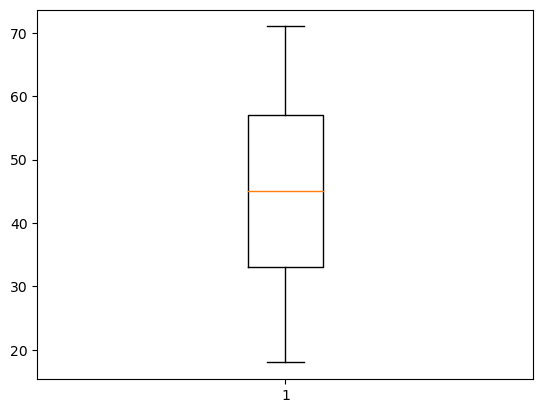

In [84]:
#let's check for the outlier's in age column
plt.boxplot(df['Age'])


#hence there is no outliers

In [85]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [86]:
df.isnull().sum().sum()

0

In [87]:
# Determining unique values of each columns

for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

yummy : ['No' 'Yes']
convenient : ['Yes' 'No']
spicy : ['No' 'Yes']
fattening : ['Yes' 'No']
greasy : ['No' 'Yes']
fast : ['Yes' 'No']
cheap : ['Yes' 'No']
tasty : ['No' 'Yes']
expensive : ['Yes' 'No']
healthy : ['No' 'Yes']
disgusting : ['No' 'Yes']
Like : ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
Age : [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
VisitFrequency : ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender : ['Female' 'Male']


In [88]:
# By Observation from above data following rows have contradictary information. The value is given as 'Yes' for both 'yummy' and 'disgusting'.
# not yummy doesnt give you the meaning that the food is disgusting, so we exclude the No-No combination from contradictions.


contradict_1=df[(df['yummy']=='Yes') & (df['disgusting']=='Yes')]
contradict_1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
11,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,+3,28,Once a month,Male
19,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,I love it!+5,37,More than once a week,Male
20,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,+2,41,Once a year,Female
22,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,-2,23,Once a week,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,+4,20,Once a week,Male
1344,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,-3,55,Once a year,Female
1381,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,+3,26,Once a week,Female
1434,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,41,Once a week,Male


In [89]:
# same way,The value is 'Yes' for both 'tasty' and 'disgusting'
# Not tasty need not mean that the food is disgusting, so we exclude the No-No combination from contradictions.


contradict_2=df[(df['tasty']=='Yes') & (df['disgusting']=='Yes')]
contradict_2

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
11,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,+3,28,Once a month,Male
19,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,I love it!+5,37,More than once a week,Male
20,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,+2,41,Once a year,Female
22,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,-2,23,Once a week,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,+1,46,Every three months,Male
1415,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,-3,57,Every three months,Male
1434,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,41,Once a week,Male
1439,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,+1,61,Once a month,Male


In [90]:
# Removing rows which contains the above mentioned contradictory information

union_df=pd.concat([contradict_1,contradict_2],ignore_index=False)
union_df=union_df.drop_duplicates()
indices_to_drop = union_df.index.tolist()
data=df.drop(indices_to_drop)

In [91]:
data.shape

#cleaned data

(1350, 15)

In [92]:
# Let's Create copy of the dataframe and creating bins for the 'Age' column

datacopy=data.copy()
datacopy['Agebin'] = pd.cut(datacopy['Age'], bins = [15,25, 35, 50, 60, 70, 75], labels = ['10-25','26-35', '36-50', '51-60', '61-70','71-75'])


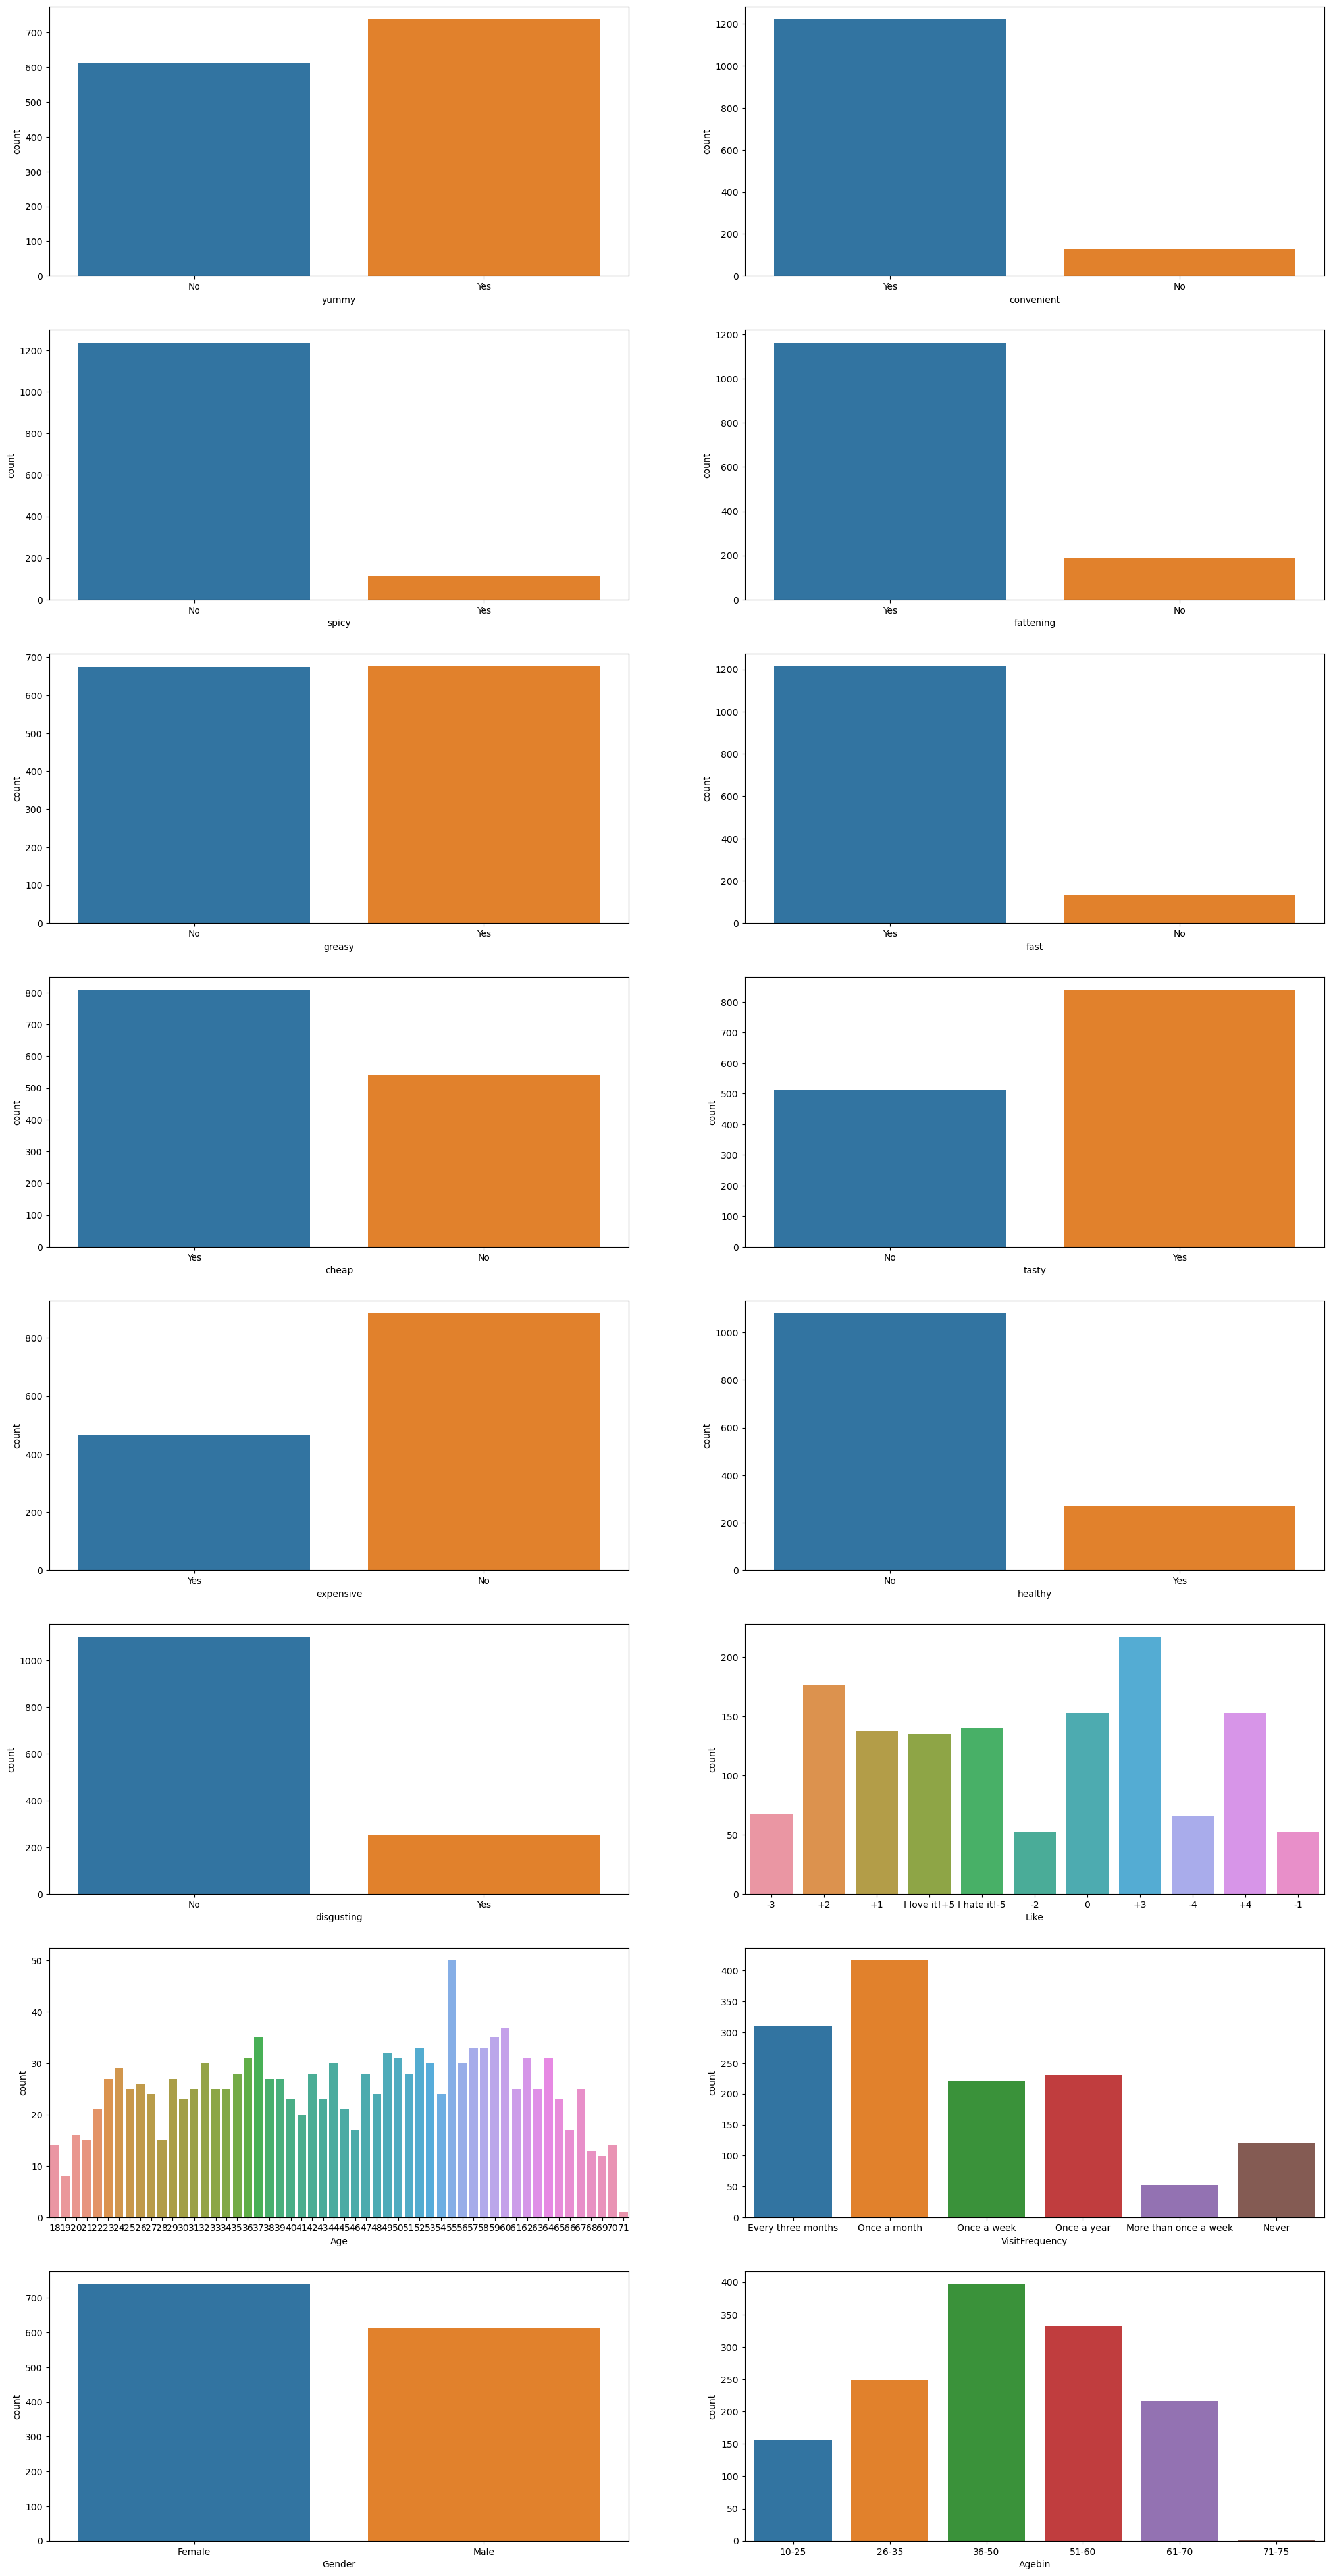

In [93]:
# Let's find the distribution of values in each and every columns to anlalyze the data

fig, axs = plt.subplots(8, 2, figsize=(25, 50))
axs = axs.flatten()
for x, col in enumerate(datacopy.columns):
    sns.countplot(x=col,data=datacopy,ax=axs[x])
    
    
   

In [94]:
#to get the propotionate values in the data

for i in data.columns:
    print(data[i].value_counts()/len(data)*100 )

Yes    54.666667
No     45.333333
Name: yummy, dtype: float64
Yes    90.518519
No      9.481481
Name: convenient, dtype: float64
No     91.555556
Yes     8.444444
Name: spicy, dtype: float64
Yes    86.074074
No     13.925926
Name: fattening, dtype: float64
Yes    50.074074
No     49.925926
Name: greasy, dtype: float64
Yes    89.925926
No     10.074074
Name: fast, dtype: float64
Yes    59.925926
No     40.074074
Name: cheap, dtype: float64
Yes    62.148148
No     37.851852
Name: tasty, dtype: float64
No     65.481481
Yes    34.518519
Name: expensive, dtype: float64
No     80.0
Yes    20.0
Name: healthy, dtype: float64
No     81.481481
Yes    18.518519
Name: disgusting, dtype: float64
+3              16.074074
+2              13.111111
0               11.333333
+4              11.333333
I hate it!-5    10.370370
+1              10.222222
I love it!+5    10.000000
-3               4.962963
-4               4.888889
-2               3.851852
-1               3.851852
Name: Like, dtype: flo

In [95]:
# Converting string values of the 'Like' column to numerical form

data=data.replace('-1',-1)
data=data.replace('-2',-2)
data=data.replace('-3',-3)
data=data.replace('-4',-4)
data=data.replace('+1',1)
data=data.replace('+2',2)
data=data.replace('+3',3)
data=data.replace('+4',4)
data=data.replace('0',0)
data=data.replace('I love it!+5',5)
data=data.replace('I hate it!-5',-5)

In [96]:
# The following pairs of variables essentially express the same idea in the data:
# (like, tasty),(like, disgusting) and (expensive, cheap)
# the columns 'expensive', 'disgusting' and 'like' can be dropped.

data.drop(['expensive', 'disgusting', 'Like'], inplace=True, axis=1)

In [97]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,No,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,62,Every three months,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,55,Every three months,Male


In [98]:
# According to the data ,list of categorical value columns

objectList = data.select_dtypes(include = "object").columns
print (objectList)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'healthy', 'VisitFrequency', 'Gender'],
      dtype='object')


In [99]:
# Converting categorical Columns to numeric
from sklearn import preprocessing
le=preprocessing.LabelEncoder()


#Converting all the categorical value columns to numeric columns 

for i in objectList:
    data[i] = le.fit_transform(data[i])

print (data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1452
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1350 non-null   int32
 1   convenient      1350 non-null   int32
 2   spicy           1350 non-null   int32
 3   fattening       1350 non-null   int32
 4   greasy          1350 non-null   int32
 5   fast            1350 non-null   int32
 6   cheap           1350 non-null   int32
 7   tasty           1350 non-null   int32
 8   healthy         1350 non-null   int32
 9   Age             1350 non-null   int64
 10  VisitFrequency  1350 non-null   int32
 11  Gender          1350 non-null   int32
dtypes: int32(11), int64(1)
memory usage: 79.1 KB
None


In [131]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,0,61,0,0
1,1,1,0,1,1,1,1,1,0,51,0,0
2,0,1,1,1,1,1,0,1,1,62,0,0


In [132]:
#We need to scale the data and perform futher process on scaled version of data
#let's apply scaling on both 'Age' and 'VisitFrequency' column


from sklearn.preprocessing import MinMaxScaler
scaled_df=data.copy()
scaled_df.iloc[:,9:11]=MinMaxScaler().fit_transform(scaled_df.iloc[:,9:11])

In [133]:
scaled_df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,0,0.811321,0.0,0
1,1,1,0,1,1,1,1,1,0,0.622642,0.0,0
2,0,1,1,1,1,1,0,1,1,0.830189,0.0,0
4,0,1,0,1,1,1,1,0,1,0.584906,0.6,1
5,1,1,0,1,0,1,1,1,0,0.698113,0.0,1


In [134]:
#Principal Component Analysis

from sklearn.decomposition import PCA

In [135]:
pca_compo=PCA(n_components=11).fit(scaled_df)

In [136]:
pca_compo.components_

array([[-5.98874087e-01, -1.56606908e-01, -8.75384990e-03,
         1.27994355e-01,  3.25215203e-01, -1.00341670e-01,
        -2.32080520e-01, -5.88392285e-01, -2.56866452e-01,
         5.83130205e-02,  1.34932754e-02,  1.22073095e-01],
       [ 2.58461400e-02, -4.65885427e-02,  3.09830190e-02,
        -2.34791358e-01, -4.10241591e-01, -1.21039698e-01,
        -4.76134728e-01,  2.80217893e-02,  9.82760911e-02,
         6.88944264e-02, -4.21045777e-02,  7.17257873e-01],
       [-3.67861755e-01, -2.17915145e-02,  2.92724626e-03,
        -2.59576176e-01, -6.42188526e-01,  4.73388823e-02,
         3.83392195e-01, -3.01386874e-01,  2.04724814e-01,
         2.35519040e-01,  5.65655475e-03, -2.16634114e-01],
       [ 5.55088364e-02, -7.18895121e-02, -3.08206660e-02,
        -4.56445710e-02, -2.09846921e-01, -1.58982479e-01,
        -7.07585656e-01,  1.46386096e-03,  2.36905727e-02,
         3.04980362e-02, -3.37033087e-02, -6.45057577e-01],
       [-2.45950570e-02, -1.14502798e-01,  1.3558101

In [137]:
#we use explained variance ratio is used as metric to evalute the usefulness of PCA

pca_compo.explained_variance_ratio_

array([0.25677724, 0.13775668, 0.13409026, 0.11029037, 0.07749798,
       0.06270064, 0.04770758, 0.04357158, 0.0391985 , 0.03257548,
       0.03205534])

In [138]:
pca_df = pd.DataFrame(data=pca_compo.components_ , columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12"])
pca_df.head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,-0.598874,-0.156607,-0.008754,0.127994,0.325215,-0.100342,-0.232081,-0.588392,-0.256866,0.058313,0.013493,0.122073
1,0.025846,-0.046589,0.030983,-0.234791,-0.410242,-0.121040,-0.476135,0.028022,0.098276,0.068894,-0.042105,0.717258
2,-0.367862,-0.021792,0.002927,-0.259576,-0.642189,0.047339,0.383392,-0.301387,0.204725,0.235519,0.005657,-0.216634
3,0.055509,-0.071890,-0.030821,-0.045645,-0.209847,-0.158982,-0.707586,0.001464,0.023691,0.030498,-0.033703,-0.645058
4,-0.024595,-0.114503,0.135581,-0.388387,0.445303,-0.141515,-0.023188,-0.092572,0.767426,-0.006962,-0.002399,-0.025130
5,-0.016649,0.080355,0.093640,0.013510,0.045116,0.059727,0.018821,-0.003600,-0.015800,0.098754,-0.983990,-0.010368
6,0.200584,-0.540624,-0.285553,-0.286936,0.000606,-0.585141,0.241880,-0.012626,-0.273532,-0.117311,-0.116650,-0.019375
7,-0.128548,-0.084616,0.670796,-0.359366,0.127450,-0.040295,0.019488,0.317278,-0.357996,0.369215,0.100226,-0.061369
8,-0.031607,-0.132550,0.339218,0.679721,-0.140700,-0.514096,0.091691,0.092755,0.266919,0.174714,0.007936,0.037505
9,0.227311,-0.748827,0.146374,0.171870,-0.052642,0.552182,-0.040671,-0.125788,0.073817,0.074992,-0.011750,0.016091


In [139]:
cumulative_variance = np.cumsum(pca_compo.explained_variance_ratio_)

cumulative_variance

array([0.25677724, 0.39453392, 0.52862418, 0.63891456, 0.71641254,
       0.77911318, 0.82682076, 0.87039234, 0.90959083, 0.94216631,
       0.97422165])

In [140]:
# By Observing the cumulative variance, 90% of the variance is explained by the first 9 principal components.

final_pca_comp=PCA(n_components=9).fit_transform(scaled_df)

In [141]:
data_pca=pd.DataFrame(final_pca_comp, columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"])

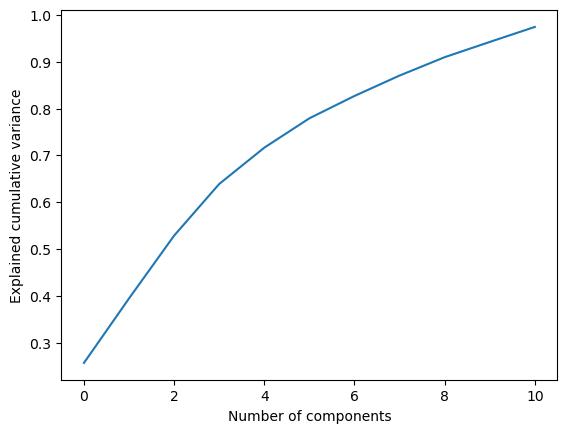

In [142]:
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained cumulative variance')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


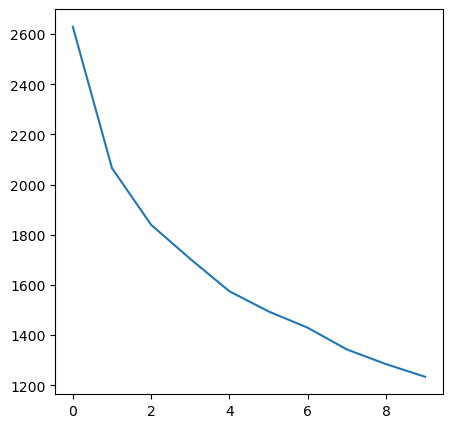

In [143]:
#since clustering can be done on large data set
# Determining the number of clusters 

from sklearn.cluster import KMeans

count=list(range(1,11))
distance=list([0]*10)
for x in count:
    clustr_res=KMeans(n_clusters=x).fit(scaled_df)
    distance[x-1]=clustr_res.inertia_
plt.figure(figsize=(5,5))
plt.plot(distance)

In [145]:
# Extracting segments from the scaled data
#performing inertia will measure how well the dataset is clustered by K-Means


final_cluster=KMeans(n_clusters=4).fit(scaled_df)

final_cluster.inertia_

1693.937582469573

In [146]:
scaled_df['cluster'] = final_cluster.labels_

In [147]:
# cluster size

from collections import Counter
Counter(final_cluster.labels_)

Counter({3: 283, 2: 299, 0: 295, 1: 473})

Text(0, 0.5, 'count of members')

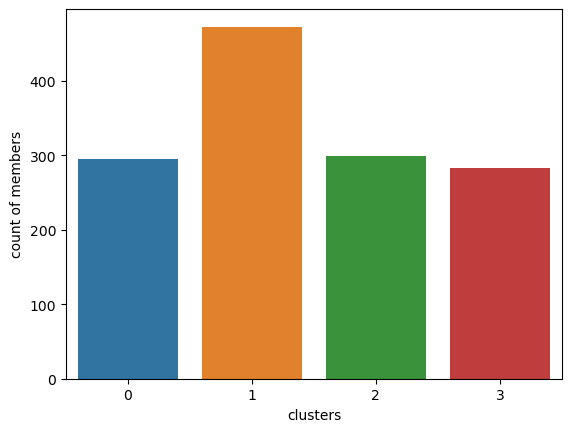

In [148]:

sns.countplot(x=scaled_df['cluster'])
plt.xlabel("clusters")
plt.ylabel("count of members")

In [149]:
#finding the range of the 'age' column
age_range=data['Age'].max()-data['Age'].min()
age_range

# Finding the minimum value in the 'Age'column
x=data['Age'].min()
x

18

In [150]:
scaled_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,0,0.811321,0.0,0,3
1,1,1,0,1,1,1,1,1,0,0.622642,0.0,0,2
2,0,1,1,1,1,1,0,1,1,0.830189,0.0,0,0
4,0,1,0,1,1,1,1,0,1,0.584906,0.6,1,3
5,1,1,0,1,0,1,1,1,0,0.698113,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,0,0.547170,1.0,1,0
1449,1,1,0,1,0,0,1,1,1,0.339623,0.8,0,1
1450,1,1,0,1,0,1,0,1,0,0.641509,0.6,0,1
1451,1,1,0,0,0,1,1,1,1,0.433962,0.0,1,1


In [151]:
#Restoring the original values to columns for us to analyse the data while doing clustering 

scaled_df['yummy']=scaled_df['yummy'].map({0:'No',1:'Yes'})
scaled_df['convenient']=scaled_df['convenient'].map({0:'No',1:'Yes'})
scaled_df['spicy']=scaled_df['spicy'].map({0:'No',1:'Yes'})
scaled_df['fattening']=scaled_df['fattening'].map({0:'No',1:'Yes'})
scaled_df['greasy']=scaled_df['greasy'].map({0:'No',1:'Yes'})
scaled_df['fast']=scaled_df['fast'].map({0:'No',1:'Yes'})
scaled_df['cheap']=scaled_df['cheap'].map({0:'No',1:'Yes'})
scaled_df['tasty']=scaled_df['tasty'].map({0:'No',1:'Yes'})
scaled_df['healthy']=scaled_df['healthy'].map({0:'No',1:'Yes'})
scaled_df['Age']=scaled_df['Age']*age_range+x
scaled_df['VisitFrequency']=scaled_df['VisitFrequency'].map({0.0:'Every three months', 0.8:'once a week', 0.6:'once a month', 1.0:'once a year', 0.4:'Never',0.2:'More than once a week'})
scaled_df['Gender']=scaled_df['Gender'].map({0:'Female',1:'Male'})

In [152]:
scaled_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,No,61.0,Every three months,Female,3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,51.0,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,62.0,Every three months,Female,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,49.0,NaN,Male,3
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,55.0,Every three months,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,No,47.0,once a year,Male,0
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,36.0,once a week,Female,1
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,No,52.0,NaN,Female,1
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,41.0,Every three months,Male,1


In [154]:
scaled_df.fillna(value={'VisitFrequency':'once a month'}, inplace=True)

In [156]:
scaled_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,No,61.0,Every three months,Female,3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,51.0,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,62.0,Every three months,Female,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,49.0,once a month,Male,3
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,55.0,Every three months,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,No,47.0,once a year,Male,0
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,36.0,once a week,Female,1
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,No,52.0,once a month,Female,1
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,41.0,Every three months,Male,1


In [158]:
#age wise clusters

cluster_age =pd.crosstab(scaled_df['cluster'],scaled_df['Age'])
cluster_age


datacopy2=scaled_df.copy()
datacopy2['Agebin'] = pd.cut(datacopy2['Age'], bins = [15,25, 35, 50, 60, 70, 75], labels = ['15-25','26-35', '36-50', '51-60', '61-70','71-75'])
cluster_agebin =pd.crosstab(datacopy2['cluster'],datacopy2['Agebin'])
cluster_agebin

Agebin,15-25,26-35,36-50,51-60,61-70,71-75
cluster,,,,,,
0,10,35,103,91,56,0
1,37,76,140,132,87,1
2,90,99,58,37,15,0
3,18,38,65,104,58,0


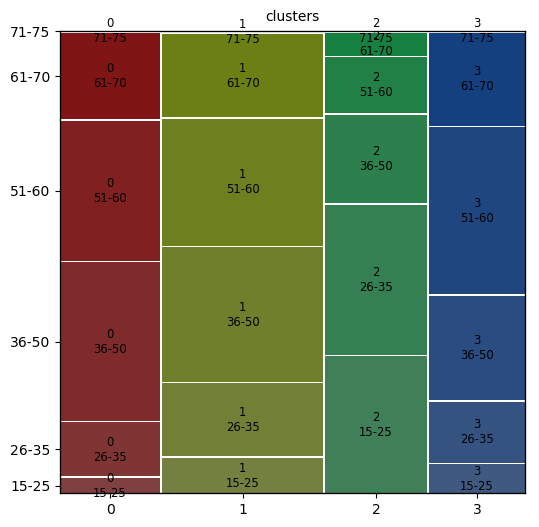

In [190]:
#MOSAIC PLOT

from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['figure.figsize'] = (6,6)
mosaic(cluster_agebin.stack())
plt.xlabel('clusters')
plt.show()

In [159]:
cluster_vfreq =pd.crosstab(scaled_df['cluster'],scaled_df['VisitFrequency'])
cluster_vfreq

VisitFrequency,Every three months,More than once a week,Never,once a month,once a week,once a year
cluster,,,,,,
0,79,2,55,56,23,80
1,104,30,3,202,100,34
2,61,19,3,116,77,23
3,66,1,59,42,21,94


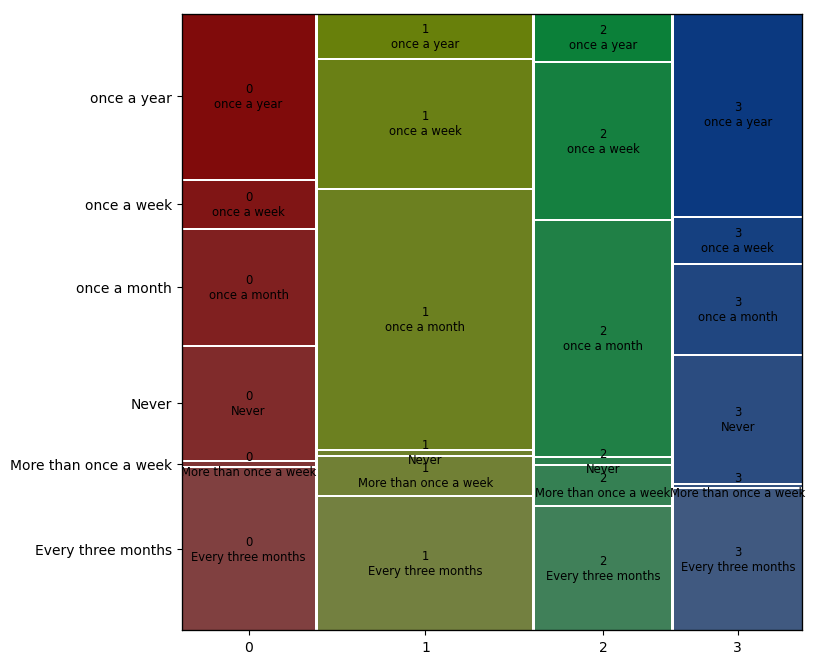

In [168]:
from statsmodels.graphics.mosaicplot import mosaic


plt.rcParams['figure.figsize'] = (8,8)
mosaic(cluster_vfreq.stack())
plt.show()


In [197]:
#calculating proportions

cluster_vfreq_prop = cluster_vfreq.apply(lambda x: 100*x/x.sum(), axis=1)
print(cluster_vfreq_prop)

VisitFrequency  Every three months  More than once a week      Never  \
cluster                                                                
0                        26.779661               0.677966  18.644068   
1                        21.987315               6.342495   0.634249   
2                        20.401338               6.354515   1.003344   
3                        23.321555               0.353357  20.848057   

VisitFrequency  once a month  once a week  once a year  
cluster                                                 
0                  18.983051     7.796610    27.118644  
1                  42.706131    21.141649     7.188161  
2                  38.795987    25.752508     7.692308  
3                  14.840989     7.420495    33.215548  


In [195]:

cluster_gender =pd.crosstab(scaled_df['cluster'],scaled_df['Gender'])
cluster_gender

Gender,Female,Male
cluster,,
0,124,171
1,278,195
2,174,125
3,163,120


In [198]:
#calculating gender proportions

cluster_gender_prop = cluster_gender.apply(lambda x: 100*x/x.sum(), axis=1)
print(cluster_gender_prop)

Gender      Female       Male
cluster                      
0        42.033898  57.966102
1        58.773784  41.226216
2        58.193980  41.806020
3        57.597173  42.402827


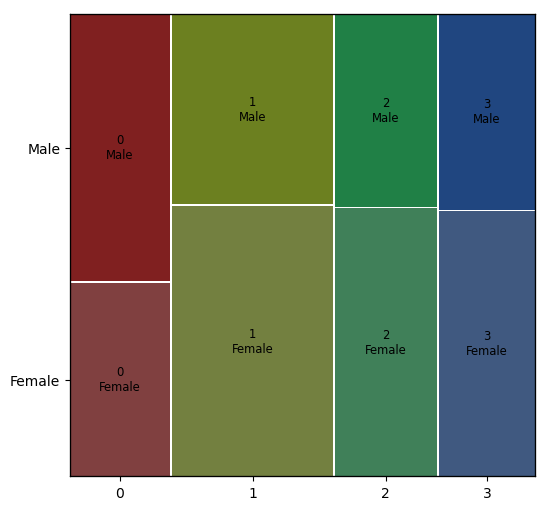

In [164]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['figure.figsize'] = (6,6)
mosaic(cluster_gender.stack())
plt.show()

In [169]:
cluster_tasty =pd.crosstab(scaled_df['cluster'],scaled_df['tasty'])
cluster_tasty

tasty,No,Yes
cluster,,
0,248,47
1,9,464
2,9,290
3,245,38


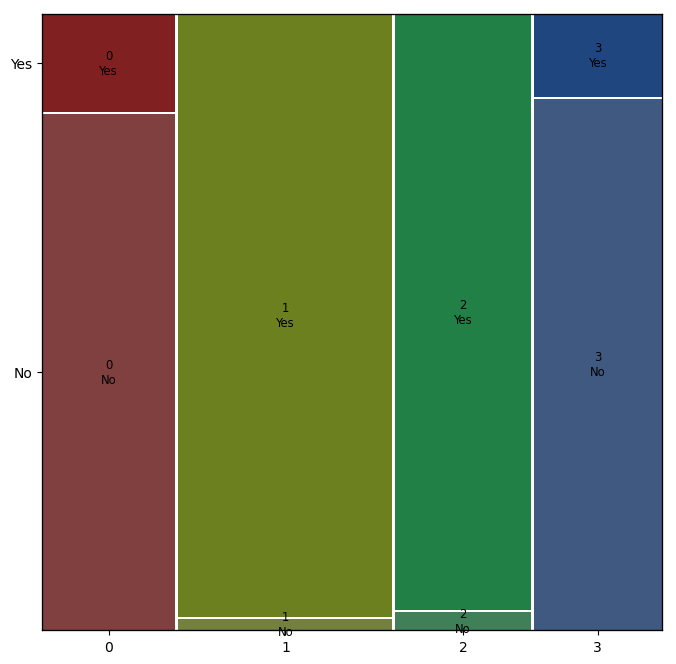

In [171]:
plt.rcParams['figure.figsize'] = (8,8)
mosaic(cluster_tasty.stack())
plt.show()

In [174]:
cluster_healthy =pd.crosstab(scaled_df['cluster'],scaled_df['healthy'])
cluster_healthy

healthy,No,Yes
cluster,,
0,280,15
1,297,176
2,247,52
3,256,27


observations:

.majority of people from clusters 0,2 and 3 find food to be unhealthy
.few percentage of cluster 1 members think that the food is healthy

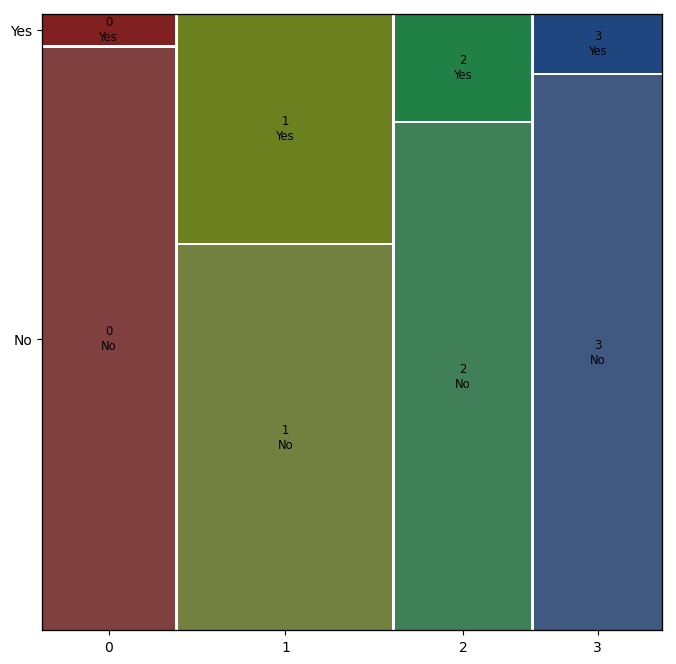

In [175]:
plt.rcParams['figure.figsize'] = (8,8)
mosaic(cluster_healthy.stack())
plt.show()

In [177]:
cluster_con =pd.crosstab(scaled_df['cluster'],scaled_df['convenient'])
cluster_con

convenient,No,Yes
cluster,,
0,73,222
1,11,462
2,7,292
3,37,246


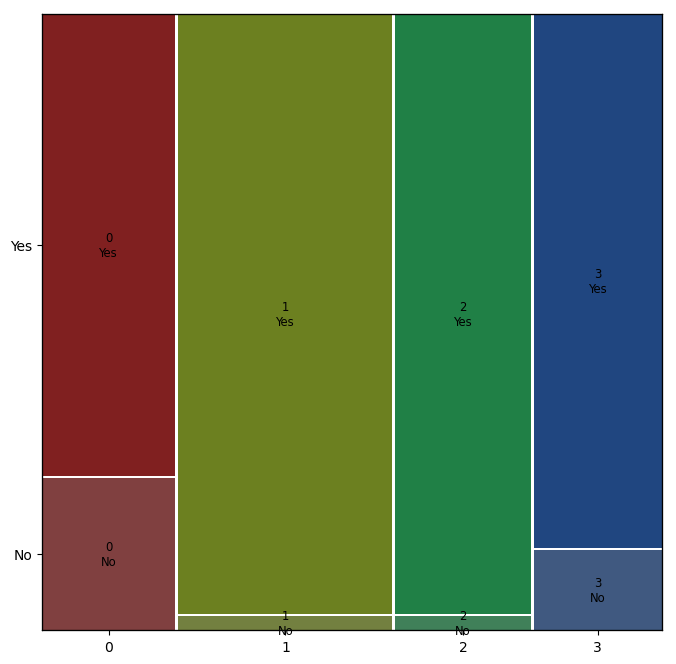

In [178]:
plt.rcParams['figure.figsize'] = (8,8)
mosaic(cluster_c.stack())
plt.show()

In [179]:
cluster_fat=pd.crosstab(scaled_df['cluster'],scaled_df['fattening'])
cluster_fat

fattening,No,Yes
cluster,,
0,34,261
1,128,345
2,9,290
3,17,266


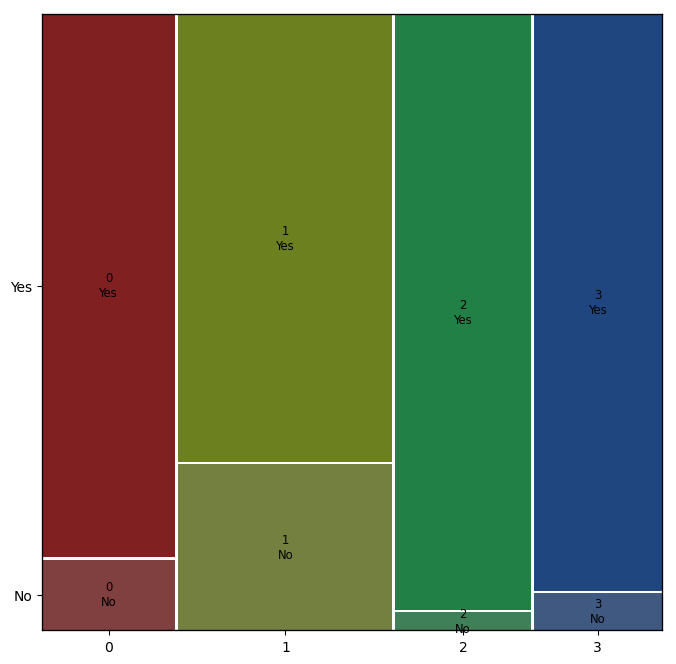

In [182]:
plt.rcParams['figure.figsize'] = (8,8)
mosaic(cluster_fat.stack())
plt.show()

In [180]:
cluster_f=pd.crosstab(scaled_df['cluster'],scaled_df['fast'])
cluster_f

fast,No,Yes
cluster,,
0,80,215
1,27,446
2,17,282
3,12,271


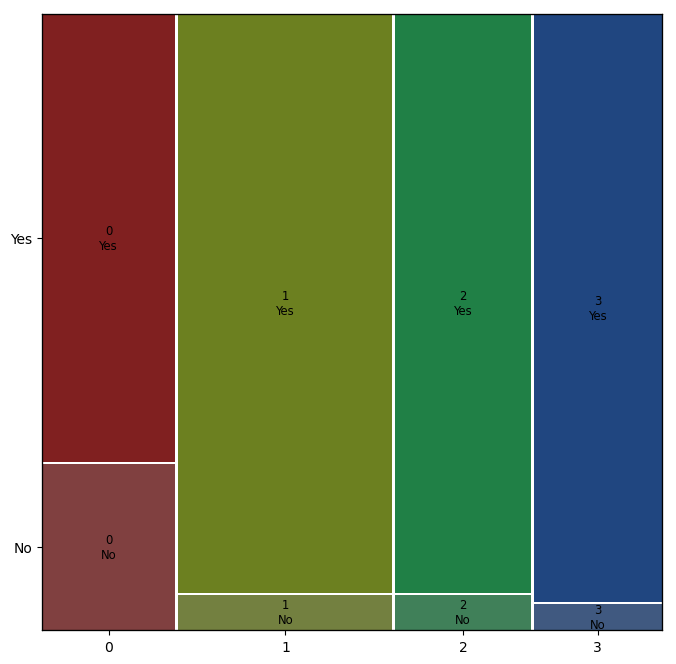

In [183]:
plt.rcParams['figure.figsize'] = (8,8)
mosaic(cluster_f.stack())
plt.show()

In [184]:
cluster_cheap =pd.crosstab(scaled_df['cluster'],scaled_df['cheap'])
cluster_cheap

cheap,No,Yes
cluster,,
0,295,0
1,132,341
2,114,185
3,0,283


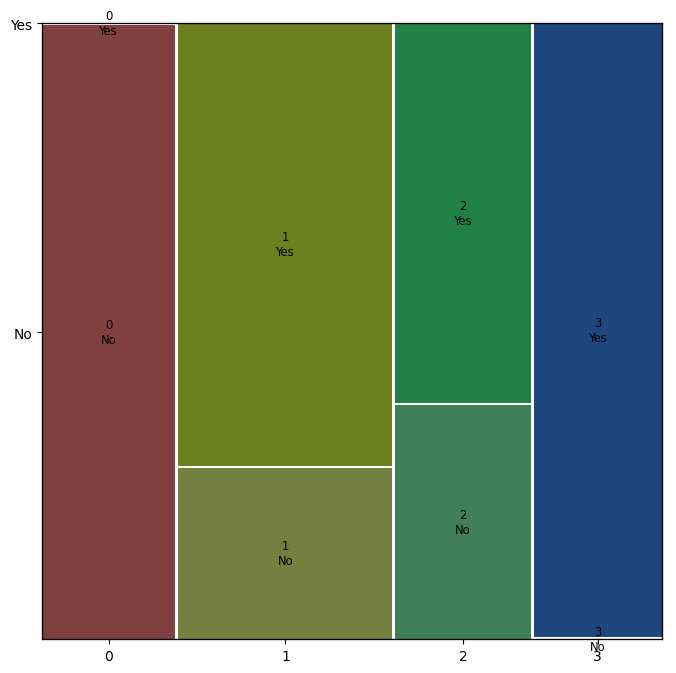

In [186]:
plt.rcParams['figure.figsize'] = (8,8)
mosaic(cluster_cheap.stack())
plt.show()